#Ejemplo 5: Predicción de cáncer de pecho
---



**Objetivo y comprensión del problema**

El objetivo del problema consisten en predecir la posibilidad de cáncer de acuerdo a un conjunto de datos que especifica dimensiones o características de los pacientes así como si han desarrollado este tipo de cáncer. 

Se trata de un problema de clasificación.




## Paso 1: Gestión de los datos




Para la configuración de las bibliotecas a importar, se incluye Keras, sklearn y pandas para la gestión de datos.

In [0]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential, load_model
from keras.layers import Dense
from sklearn.metrics import confusion_matrix


**1.1-Carga de datos**

En este caso, los datos están disponibles como un CSV que se carga desde un directorio de Google Drive. 

Para ello, primeramente se montará la unidad de Google Drive en el notebook.

In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* Verificar dónde están nuestros datos.

In [98]:
!ls "/content/drive/My Drive"

 2.2-corto.docx
 2.2-corto.docx.gdoc
 273-profesor-joalvare-participacion.xls
 395-profesor-joalvare-participacion.xls
 395-profesor-joalvare-participacion.xls.gsheet
'3 way PIA-2018-4971 - TBC - BRTE - UC3M.docx'
'AA0 Robo Journalism'
'Alerts System Project_RTVE_UCIII_EBU'
 AMASS-INFINEON-OCT-2016.gdoc
 ANECA
 API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10399837.csv
 API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_10399733.csv
'Archivos de Prueba TTL'
 Asturias.gmap
'Attendace 1º cuatrimestre 2018-2019.gsheet'
 Attendance.gsheet
 BLOCKCHAIN-EXTERNO
 books
 Borrador-Infraestructura-Hojas-de-Cálculo.gdoc
 CalendarioLaboral2015.pdf
 Call-Visiting-Draft.gdoc
 CAMINO
 CCII
'Celtic-Plus IoD'
'Certif Blockchain Alastria Developer'
'Certif Blockchain UNIR Alastria CCII'
 ChemaJuanmi
'Colab Notebooks'
'Consejo departamento.gsheet'
'Consulting proposal.gslides'
 Copyright-issues-Inf.X-Semana-3.gsheet
'Course Evaluation.gform'
 courses
'CRYSTAL-IoS Domains: Knowledge Management and System KPIs.gform'
'CRYSTAL-IoS Dom

* Cargar los datos en un dataset. Se utiliza la función de pandas de leer un CSV, por omisión el separador de la , con lo que no es necesario realizar más configuración en la lectura.

In [0]:
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/cancer.csv")

* Se cargan 569 tuplas.

In [100]:
print (len(dataset))


569


**1.2-Visualización de los datos**

*   Se puede comprobar la forma que tienen nuestros datos. En este caso, 569 instancias con 33 dimensiones.


In [101]:
print(dataset.head(5))
print(dataset.columns.values)
print(dataset.info())
print(dataset.describe())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  sm

**1.3-Codificar los datos**

En este caso se asegura que los datos son todos numéricos.

Se deben escalar los datos para que el aprendizaje funcione correctamente.


*  La 1 primera columna se puede quitar (un identificador).
*  La 2 columna es la clase a predecir que se codifica como 0, 1.



In [102]:
X = dataset.iloc[:, 2:32]
print(X.info())
print(type(X))
y = dataset.iloc[:, 1]
print(y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 non-null float64
symmetry_se                569 

* Se codifican las clases con una utilidad: LabelEncoder (string-->número)

In [103]:
print(y[100:110])
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print([y[100:110]])

100    M
101    B
102    B
103    B
104    B
105    M
106    B
107    B
108    M
109    B
Name: diagnosis, dtype: object
[array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0])]


**1.4-Seleccionar los datos**

En este caso, se dividen los datos, el 80% para entrenamiento, y el 20% para test. 

Se utiliza la función *[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)* disponible en scikit.





In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

## Paso 2: Arquitectura e implementación de nuestra red


1.   La entrada de nuestra red será una capa con 30 nodos de acuerdo a las dimensiones de nuestros datos.
2.   La función de activación o filtrado de esta primera capa será relu. Esta capa es "densa" o "totalmente conectada". Las capas intermedias irán reduciendo el nº de unidades de salida a la mitad (16,8,6,1)
3.   La función de activación en la capa de salida será "sigmoid". Es decir, se predice si hay cáncer o no, de ahí una sola salida (1).
4. La función de pérdida será  **binary_crossentrop** adecuada para clasificación binaria (tiene cáncer o no).
5. La función de optimización **adam**. 
6. Métricas: en este caso se selecciona sólo la precisión.



In [105]:
network = Sequential()
network.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=30))
network.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
network.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 16)                496       
_________________________________________________________________
dense_40 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 9         
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [0]:
network.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

## Paso 3:  Entrenamiento



En este caso el entrenamiento se realiza utilizando el 80% de los datos y el 20% para el test (validation_split).

Se establece además que el número de epochs  es 120, es decir, este número corresponde al número de pasadas completas de datos. Este número tiene impacto en el entrenamiento de la red y, normalmente, a más epochs el entrenamiento debería ser mejor. Los pesos irán de underfitting-->óptimo-->overfitting. No existe una regla para asignar el número exacto, se deben realizar pruebas.

El batch size se establece en 1, indicando el nº de datos/tuplas que se utilizararán para el entrenamiento.

Las iteraciones es el número de batches necesarios para completar un epoch.

Por ejemplo, si tenemos un dataset de 100 muestras y batches de 25, se necesitarán 4 iteraciones para completar un epoch.



In [107]:
history = network.fit(X_train, y_train, batch_size=1, epochs=100)

Epoch 1/100
455/455 [==============================] - 2s 4ms/step - loss: 0.6703 - acc: 0.6286
Epoch 2/100
455/455 [==============================] - 0s 1ms/step - loss: 0.6565 - acc: 0.6374
Epoch 3/100
455/455 [==============================] - 0s 1ms/step - loss: 0.6501 - acc: 0.6374
Epoch 4/100
455/455 [==============================] - 0s 1ms/step - loss: 0.5508 - acc: 0.7429
Epoch 5/100
455/455 [==============================] - 0s 1ms/step - loss: 0.2705 - acc: 0.9538
Epoch 6/100
455/455 [==============================] - 0s 1ms/step - loss: 0.1424 - acc: 0.9736
Epoch 7/100
455/455 [==============================] - 0s 1ms/step - loss: 0.0914 - acc: 0.9824
Epoch 8/100
455/455 [==============================] - 0s 1ms/step - loss: 0.0741 - acc: 0.9846
Epoch 9/100
455/455 [==============================] - 0s 1ms/step - loss: 0.0657 - acc: 0.9890
Epoch 10/100
455/455 [==============================] - 0s 1ms/step - loss: 0.0612 - acc: 0.9868
Epoch 11/100
455/455 [=================

In [108]:
print("Accuracy (entrenamiento):",history.history['acc'])

Accuracy (entrenamiento): [0.6285714285714286, 0.6373626373626373, 0.6373626373626373, 0.7428571428571429, 0.9538461538461539, 0.9736263736263736, 0.9824175824175824, 0.9846153846153847, 0.989010989010989, 0.9868131868131869, 0.989010989010989, 0.989010989010989, 0.989010989010989, 0.989010989010989, 0.989010989010989, 0.9868131868131869, 0.989010989010989, 0.9912087912087912, 0.989010989010989, 0.9912087912087912, 0.9912087912087912, 0.9912087912087912, 0.989010989010989, 0.9912087912087912, 0.9912087912087912, 0.989010989010989, 0.9868131868131869, 0.9912087912087912, 0.989010989010989, 0.9912087912087912, 0.9912087912087912, 0.9912087912087912, 0.9912087912087912, 0.9934065934065934, 0.9912087912087912, 0.9934065934065934, 0.9956043956043956, 0.9934065934065934, 0.9912087912087912, 0.9956043956043956, 0.9956043956043956, 0.9934065934065934, 0.9934065934065934, 0.9934065934065934, 0.9956043956043956, 0.9934065934065934, 0.9956043956043956, 0.9978021978021978, 0.9978021978021978, 0.99

* Se puede mostrar la evolución de la precisión en función de las epochs.

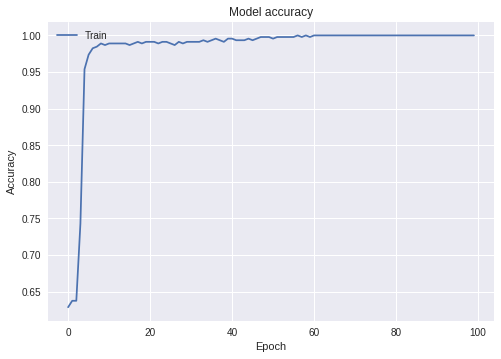

In [109]:
import matplotlib.pyplot as plt

# Plot training accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

## Paso 4:  Test y Predicción

En este caso, se va a validar con el conjunto de test:


*   Se realiza la predicción del conjunto de prueba X_test.
*   Los resultados se codifican en 0 o 1 según el valor de salida.
*   Se muestra la matriz de confusión y se calcula "a mano" la precisión de esta validación.



In [110]:
yPred = network.predict(X_test)
yPred = [1 if y > 0.5 else 0 for y in yPred]
matrix = confusion_matrix(y_test, yPred)
print(matrix)
accuracy = (matrix[0][0] + matrix[1][1]) / (matrix[0][0] + matrix[0][1] + matrix[1][0] + matrix[1][1])
print("Accuracy: " + str(accuracy * 100) + "%")

[[64  3]
 [ 0 47]]
Accuracy: 97.36842105263158%


#Paso 6: Guardar configuración del modelo

In [111]:
from keras.models import load_model
from keras.models import model_from_json

#Guardado totalmente
#network.save('/content/drive/My Drive/Colab Notebooks/models/ejemplo-5.h5')
#network = load_model('/content/drive/My Drive/Colab Notebooks/models/ejemplo-5.h5')


#Guardado de la topología: objeto Sequence
json_string = network.to_json()
network = model_from_json(json_string)


network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 16)                496       
_________________________________________________________________
dense_40 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 9         
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


#Tareas

1.   Cambiar el tipo de la función de pérdida y ver cómo afecta al resultado.
2.   Cambiar la función de optimización y ver cómo afecta al resultado.
3.   Cambiar la toplogía de la red.
4.   Cambiar el número de epochs y ver cómo afecta al resultado.
5.   Cambiar el tamaño del batch y ver cómo afecta al entrenamiento.

#Otras referencias

1. https://github.com/PacktPublishing/Keras-Deep-Learning-Cookbook/blob/master/Chapter04/breast-cancer/breast_cancer.py 